#Proyek Analisis Data: Brazilian E-Commerce Public Dataset

####Nama: Chrypson Sidabalok
####Email: chrypson7@gmail.com
####Dicoding id: chrypsons

##Menyiapkan pertanyaan

1. Apa kategori barang yang paling banyak dan paling sedikit dipesan?
2. Bagaimana distribusi jumlah pesanan berdasarkan status pesanan?
3. Bagaimana profil demografis customer berdasarkan state dan city?
4. Bagaimana tingkat kepuasan customer terhadap layanan?
5. Bagaimana performa penjualan pada platform E-Commerce setiap bulannya?

Analisis RMF:
1. Kapan terakhir kali setiap pelanggan yang terdaftar melakukan transaksi? (Recency)
2. Seberapa sering setiap pelanggan yang terdaftar melakukan pembelian dalam beberapa bulan terakhir? (Frequency)
3. Berapa banyak uang yang dibelanjakan oleh setiap pelanggan terdaftar dalam beberapa bulan terakhir? (Monetary)

##Menyiapkan library

In [1]:
#mempersiapkan library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

##Gathering data

In [2]:
#mempersiapkan data yang digunakan
orders_df = pd.read_csv("data\\orders_dataset.csv")
category_df = pd.read_csv("data\\product_category_name_translation.csv")
products_df = pd.read_csv("data\\products_dataset.csv")
sellers_df = pd.read_csv("data\\sellers_dataset.csv")
geolocation_df = pd.read_csv("data\\geolocation_dataset.csv")
order_items_df = pd.read_csv("data\\order_items_dataset.csv")
order_payments_df = pd.read_csv("data\\order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data\\order_reviews_dataset.csv")
customers_df = pd.read_csv("data\\customers_dataset.csv")

In [3]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [7]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##Assessing data

###Tabel orders_df

In [12]:
#menilai tabel orders_df
print(orders_df.info(), "\n")
print(orders_df.isna().sum(), "\n")
print("Jumlah duplikat:", orders_df.duplicated().sum(), "\n")
orders_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_da

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


1. Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya datetime bukan object
2. Terdapat missing value pada kolom order_approved_at sebanyak 160, kolom order_delivered_carrier_date sebanyak 1783, dan kolom order_delivered_customer_date sebanyak 2965.
3. Tidak terdapat data duplikat
4. Tidak terdapat keanenahan berdasarkan statistik deskriptif

###Tabel category_df

In [13]:
#menilai tabel category_df
print(category_df.info(), "\n")
print(category_df.isna().sum(), "\n")
print("Jumlah duplikat:", category_df.duplicated().sum(), "\n")
category_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None 

product_category_name            0
product_category_name_english    0
dtype: int64 

Jumlah duplikat: 0 



,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Tidak kesalahan tipe data, missing value, duplikat, dan tidak terdapat keanehan berdasarkan statistik deskriptif

###Tabel products_df

In [14]:
#menilai tabel products_df
print(products_df.info(), "\n")
print(products_df.isna().sum(), "\n")
print("Jumlah duplikat:", products_df.duplicated().sum(), "\n")
products_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None 

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
pr

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


1. Tidak terdapat kesalahan tipe data
2. Terdapat missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty sebanyak 610 sedangkan pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm sebanyak 2
3. Tidak terdapat data duplikat
4. Tidak terdapat keanehan berdasarkan statistik deskriptif

###Tabel sellers_df

In [15]:
#menilai tabel sellers_df
print(sellers_df.info(), "\n")
print(sellers_df.isna().sum(), "\n")
print("Jumlah Duplikat:", sellers_df.duplicated().sum(), "\n")
sellers_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None 

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64 



Jumlah Duplikat: 0 



,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Tidak kesalahan tipe data, missing value, duplikat, dan tidak terdapat keanehan berdasarkan statistik deskriptif

###Tabel geolocation_df

In [16]:
#menilai tabel geolocation_df
print(geolocation_df.info(), "\n")
print(geolocation_df.isna().sum(), "\n")
print("Jumlah duplikat:", geolocation_df.duplicated().sum(), "\n")
geolocation_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None 

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Jumlah duplikat: 261831 



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


1. Tidak terdapat kesalahan tipe data
2. Tidak terdapat missing value
3. Terdapat 261831 duplikat
4. tidak terdapat keanehan berdasarkan statistik deskriptif

###Tabel order_items

In [17]:
#menilai tabel order_items_df
print(order_items_df.info(), "\n")
print(order_items_df.isna().sum(), "\n")
print("Jumlah duplikat:", order_items_df.duplicated().sum(), "\n")
order_items_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None 

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Jumlah duplikat: 0 



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


1. Terdapat kesalahan tipe data pada kolom shipping_limit_date yang seharusnya datetime bukan object
2. Tidak terdapat missing value
3. Tidak terdapat duplikat
4. Tidak terdapat keanehan berdasarkan statistik deskriptif

###Tabel order_payments_df

In [18]:
#menilai tabel order_payments_df
print(order_payments_df.info(), "\n")
print(order_payments_df.isna().sum(), "\n")
print("Jumlah duplikat:", order_payments_df.duplicated().sum(), "\n")
order_payments_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None 

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Jumlah duplikat: 0 



,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Tidak kesalahan tipe data, missing value, duplikat, dan tidak terdapat keanehan berdasarkan statistik deskriptif

###Tabel order_reviews

In [19]:
#menilai tabel order_reviews_df
print(order_reviews_df.info(), "\n")
print(order_reviews_df.isna().sum(), "\n")
print("Jumlah duplikat:", order_reviews_df.duplicated().sum(), "\n")
order_reviews_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None 

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 

Jumlah duplikat: 0 



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


1. Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp yang seharusnya datetime bukan object
2. Terdapat missing value pada kolom review_comment_title sebanyak 87656 dan review_comment_message sebanyak 58247
3. Tidak terdapat duplikat
4. Tidak terdapat keanehan berdasarkan statistik deskriptif

###Tabel customers_df

In [20]:
#menilai tabel customers_df
print(customers_df.info(), "\n")
print(customers_df.isna().sum(), "\n")
print("Jumlah duplikat:", customers_df.duplicated().sum(), "\n")
customers_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Jumlah duplikat: 0 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Tidak kesalahan tipe data, missing value, duplikat, dan tidak terdapat keanehan berdasarkan statistik deskriptif

##Rangkuman assessing data

In [21]:
#membuat tabel rangkuman assesing data
df = pd.DataFrame({"data": ["orders_df", "category_df", "products_df", "sellers_df", "geolocation_df", "order_items_df", "order_payments_df", "order_reviews_df", "customers_df"],
                   "data_type": ["order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date", "-", "-", "-", "-", "shipping_limit_date", "-", "review_creation_date dan review_answer_timestamp", "-",],
                   "missing_value": ["order_approved_at sebanyak 160 order_delivered_customer_date sebanyak 2965", "-", "product_category_name, product_name_lenght, product_description_lenght, product_photos_qty sebanyak 610 sedangkan pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm sebanyak 2", "-", "-", "-", "-", "review_comment_title sebanyak 87656 dan review_comment_message sebanyak 58247","-",],
                   "duplicate": ["-", "-", "-", "-", "Terdapat 261831 duplikat", "-", "-","-","-",],
                   "inaccurate_data": ["-", "-", "-", "-", "-", "-", "-","-","-",]})
df

,data,data_type,missing_value,duplicate,inaccurate_data
0,orders_df,"order_purchase_timestamp, order_approved_at, o...",order_approved_at sebanyak 160 order_delivered...,-,-
1,category_df,-,-,-,-
2,products_df,-,"product_category_name, product_name_lenght, pr...",-,-
3,sellers_df,-,-,-,-
4,geolocation_df,-,-,Terdapat 261831 duplikat,-
5,order_items_df,shipping_limit_date,-,-,-
6,order_payments_df,-,-,-,-
7,order_reviews_df,review_creation_date dan review_answer_timestamp,review_comment_title sebanyak 87656 dan review...,-,-
8,customers_df,-,-,-,-


##Cleaning data

###Data type

In [22]:
#mengubah tipe data pada orders_df ke datetime
datetime_o = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_o:
    orders_df[column] = pd.to_datetime(orders_df[column])

#mengubah tipe data pada order_items_df ke datetime
order_items_df.shipping_limit_date = pd.to_datetime(order_items_df.shipping_limit_date)

#mengubah tipe data pada order_reviews_df ke datetime
datetime_or = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_or:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

###Missing value

In [23]:
#Melihat missing value pada orders_df
print(orders_df.isna().sum(), "\n")

#menghapus missing value pada products_df
products_df.dropna(inplace=True)
print(products_df.isna().sum(), "\n")

#Mengisi missing value pada order_reviews_df
order_reviews_df.fillna("no comment", inplace=True)
print(order_reviews_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64 

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


1. Missing value pada orders_df dibiarkan karena berkaitan dengan status pemesanan
2. Missing value pada products_df dihapus dengan pertimbangan jumlah data lebih dari 32.000 sedangkan missing value hanya 610
3. Missing value pada order_reviews_df diisi dengan "no comment"

###Duplicate

In [24]:
#Melihat duplicate data pada geolocation_df
print(geolocation_df.geolocation_city.value_counts().head(), "\n")
print(geolocation_df.geolocation_state.value_counts().head())

geolocation_city
sao paulo         135800
rio de janeiro     62151
belo horizonte     27805
são paulo          24918
curitiba           16593
Name: count, dtype: int64 

geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
Name: count, dtype: int64


Data duplikat akan dibiarkan karena memang pada kolom geolocation_city dan geolocation_state didominasi oleh Sao Paulo sehingga menyebabkan duplikasi 

##Exploratory Data Analysis (EDA)

###Kategori barang yang paling banyak dan paling sedikit dipesan

In [25]:
#menggabungkan data untuk melihat penjualan berdasarkan kategori
orders_item_products = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

#menggabungkan data untuk melihat kategori dalam bahasa inggris
category_name_df = pd.merge(
    left=orders_item_products,
    right=category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

#mengambil Kategori barang yang paling banyak dan paling sedikit dipesan
best_products = category_name_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).head().reset_index()
worst_products = category_name_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=True).head().reset_index()

#menampilkan Kategori barang yang paling banyak dan paling sedikit dipesan
print(best_products, "\n")
print(worst_products)

  product_category_name_english  order_id
0                bed_bath_table      9417
1                 health_beauty      8836
2                sports_leisure      7720
3         computers_accessories      6689
4               furniture_decor      6449 

  product_category_name_english  order_id
0         security_and_services         2
1     fashion_childrens_clothes         8
2             cds_dvds_musicals        12
3                    la_cuisine        13
4         arts_and_craftmanship        23


###Jumlah pesanan berdasarkan status pesanan

In [26]:
#jumlah pesanan berdasarkan status pesanan
order_by_order_status = orders_df.groupby("order_status").order_id.nunique().sort_values(ascending=False).reset_index()

#Menampilkan jumlah pesanan berdasarkan status pesanan
order_by_order_status

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


###Profil demografis customer berdasarkan state dan city

In [27]:
#Demografis customer berdasarkan state dan city
customer_by_state = customers_df.customer_state.value_counts().reset_index()
customer_by_city = customers_df.customer_city.value_counts().reset_index()

#Menampilkan demografis customer berdasarkan state
print(customer_by_state, "\n")
#Menampilkan demografis customer berdasarkan city
print(customer_by_city)

   customer_state  count
0              SP  41746
1              RJ  12852
2              MG  11635
3              RS   5466
4              PR   5045
5              SC   3637
6              BA   3380
7              DF   2140
8              ES   2033
9              GO   2020
10             PE   1652
11             CE   1336
12             PA    975
13             MT    907
14             MA    747
15             MS    715
16             PB    536
17             PI    495
18             RN    485
19             AL    413
20             SE    350
21             TO    280
22             RO    253
23             AM    148
24             AC     81
25             AP     68
26             RR     46 

                 customer_city  count
0                    sao paulo  15540
1               rio de janeiro   6882
2               belo horizonte   2773
3                     brasilia   2131
4                     curitiba   1521
...                        ...    ...
4114              olhos d'agua  

###Tingkat kepuasan customer

In [28]:
#Melihat tingkat kepuasan customer
order_reviews_score = order_reviews_df.review_score.value_counts().reset_index()
order_reviews_score = order_reviews_score.sort_values(by="review_score", ascending=False)

#Menampilkan tingkat kepuasan customer
order_reviews_score

,review_score,count
0,5,57328
1,4,19142
3,3,8179
4,2,3151
2,1,11424


###Performa penjualan setiap bulan

In [29]:
#Melihat performa penjualan setiap bulan
monthly_orders = orders_df.resample(rule="ME", on="order_approved_at").agg({
    "order_id": "nunique"
}).reset_index()

#Tidak mengambil september 2018
monthly_orders = monthly_orders[monthly_orders["order_approved_at"] != '2018-09-30']
monthly_orders = monthly_orders.sort_values(by="order_approved_at", ascending=False)

#Menampilkan performa penjualan setiap bulan
monthly_orders

,order_approved_at,order_id
23,2018-08-31,6620
22,2018-07-31,6176
21,2018-06-30,6164
20,2018-05-31,7066
19,2018-04-30,6778
18,2018-03-31,7288
17,2018-02-28,6706
16,2018-01-31,7187
15,2017-12-31,5832
14,2017-11-30,7395


###Analisis RFM

In [30]:
#Mempersiapkan tabel untuk membuat tabel RFM
order_items_order_df = pd.merge(
    left=order_items_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

order_customers_df = pd.merge(
    left=order_items_order_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
) 

#Membuat tabel RFM
rfm_df = order_customers_df.groupby("customer_id", as_index=False).agg({
    "order_delivered_customer_date": "max",
    "order_id": "count",
    "price": "sum"
})

#Mengubah nama kolom
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

#Mencari recency
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
recent_date = orders_df["order_delivered_customer_date"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

#Menampilkan rata-rata RFM
print("rata-rata recency", rfm_df.recency.mean(), "\n")
print("rata-rata frequency",rfm_df.frequency.mean(), "\n")
print("rata-rata monetary",rfm_df.monetary.mean())

rata-rata recency 275.3772337161574 

rata-rata frequency 1.1417306873695092 

rata-rata monetary 137.7540763788945


#Data visualization & Explanatory Data Analysis

##Pertanyaan 1. Apa kategori barang yang paling banyak dan paling sedikit dipesan?

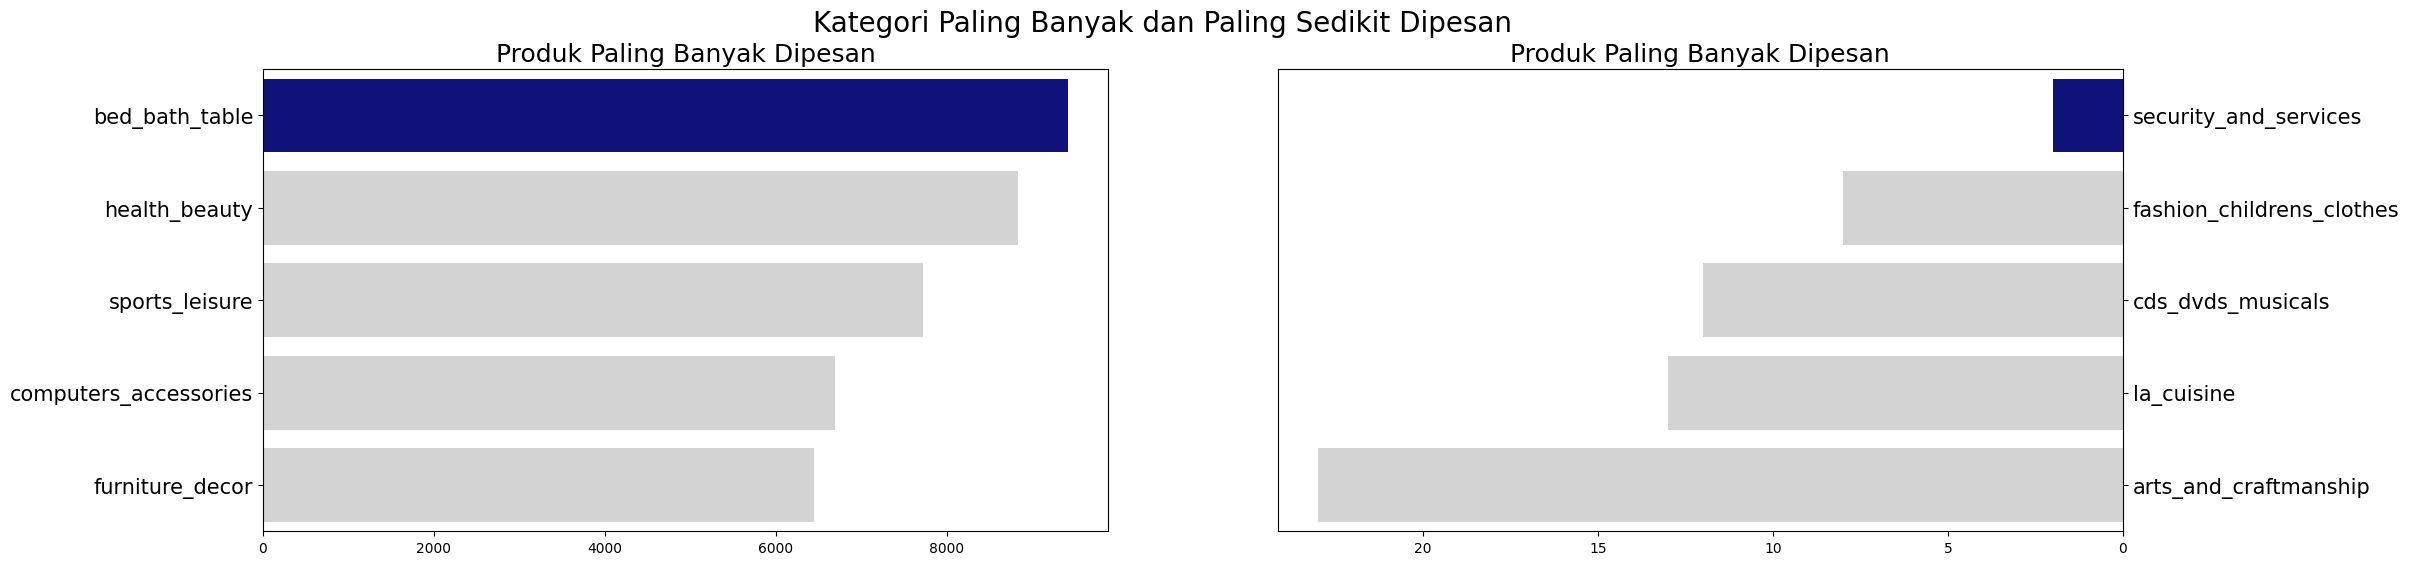

In [31]:
#Membuat visualisasi pertanyaan nomor 1
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["darkblue", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]

sns.barplot(
    x="order_id",
    y="product_category_name_english",
    data=best_products,
    ax=ax[0],
    palette=colors,
    hue="product_category_name_english"
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Paling Banyak Dipesan", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(
    x="order_id",
    y="product_category_name_english",
    data=worst_products,
    ax=ax[1],
    palette=colors,
    hue="product_category_name_english"
)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Produk Paling Banyak Dipesan", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Kategori Paling Banyak dan Paling Sedikit Dipesan", fontsize=20)
plt.show()

##Pertanyaan 2. Bagaimana distribusi jumlah pesanan berdasarkan status pesanan?

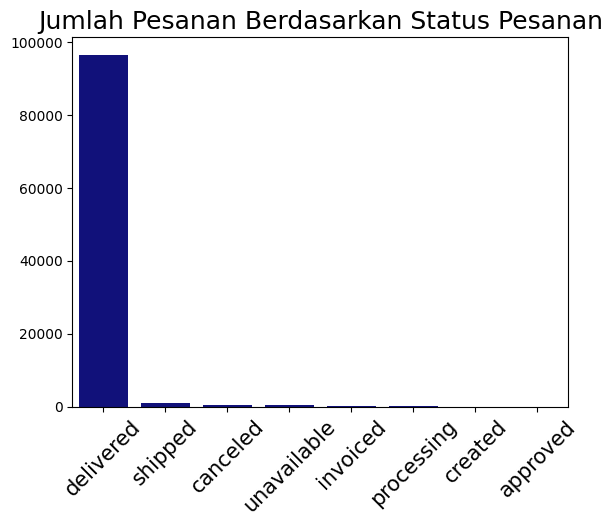

In [32]:
colors = ["darkblue", "darkblue", "darkblue", "darkblue", "darkblue", "darkblue", "darkblue", "darkblue"]

sns.barplot(
    y="order_id",
    x="order_status",
    data=order_by_order_status,
    palette=colors,
    hue="order_status"
)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, fontsize=15)
plt.title("Jumlah Pesanan Berdasarkan Status Pesanan", fontsize=18)

plt.show()

##Pertanyaan 3. Bagaimana profil demografis customer berdasarkan state dan city?

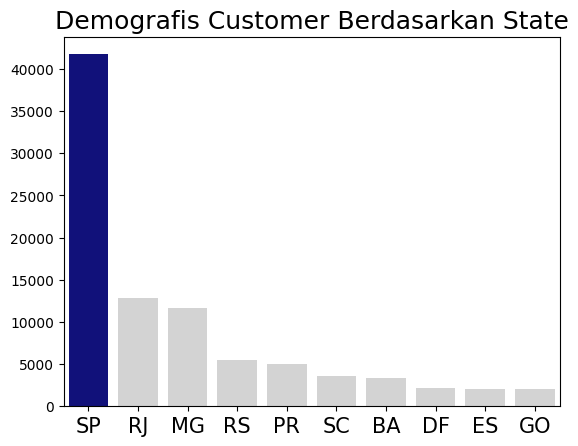

In [33]:
#visualisasi demografis customer berdasarkan state
colors = ["darkblue", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]

sns.barplot(
    y="count",
    x="customer_state",
    data=customer_by_state.head(10),
    palette=colors,
    hue="customer_state"
)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Demografis Customer Berdasarkan State", fontsize=18)
plt.xticks(fontsize=15)

plt.show()

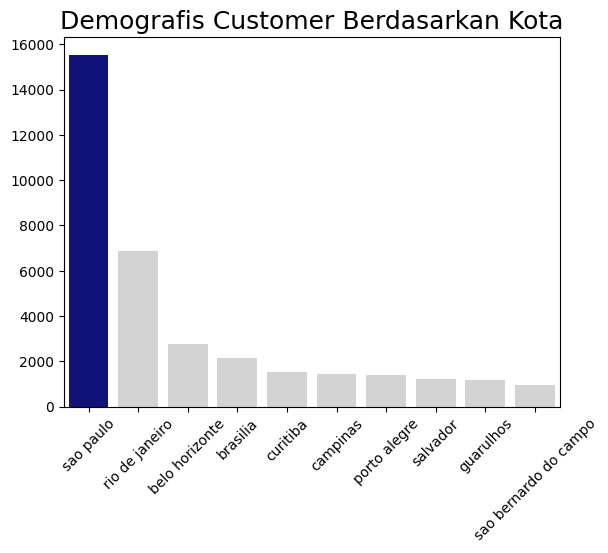

In [34]:
#visualisasi demografis customer berdasarkan city
colors = ["darkblue", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]

sns.barplot(
    y="count",
    x="customer_city",
    data=customer_by_city.head(10),
    palette=colors,
    hue="customer_city"
)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Demografis Customer Berdasarkan Kota", fontsize=18)
plt.xticks(rotation=45, fontsize=10)

plt.show()

##Pertanyaan 4. Bagaimana tingkat kepuasan customer terhadap layanan?

Text(0.5, 1.0, 'Distribusi Score Review')

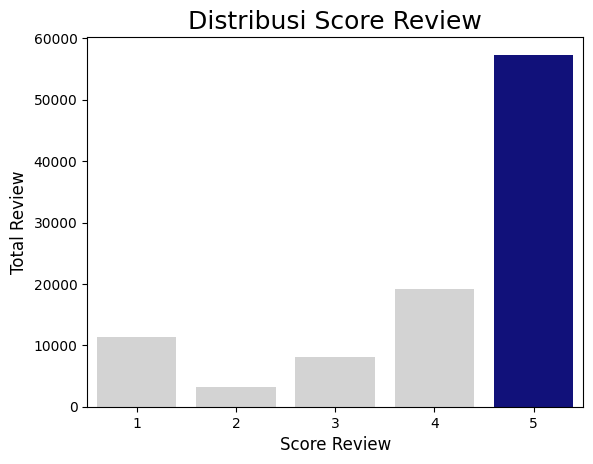

In [35]:
#Visualisasi tingkat kepuasan customer
colors = ["lightgrey", "lightgrey", "lightgrey", "lightgrey", "darkblue"]

sns.barplot(
    y="count",
    x="review_score",
    data=order_reviews_score,
    palette=colors,
    hue="review_score",
    legend=False
)
plt.ylabel("Total Review", fontsize=12)
plt.xlabel("Score Review", fontsize=12)
plt.title("Distribusi Score Review", fontsize=18)

##Pertanyaan 5. Bagaimana performa penjualan pada platform E-Commerce setiap bulannya?

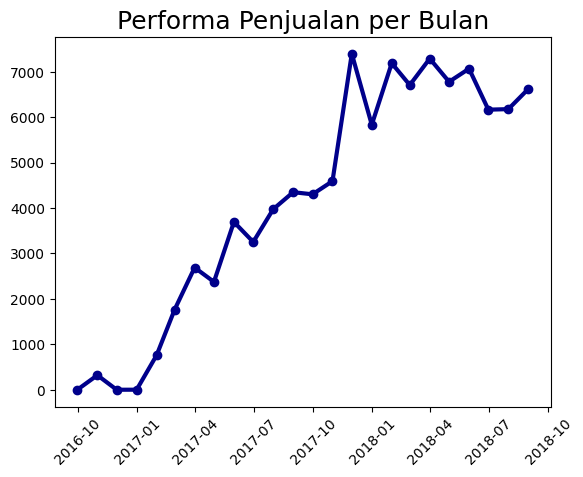

In [36]:
#Visualisasi performa penjualan pada platform E-Commerce setiap bulannya
plt.plot(
  monthly_orders.order_approved_at,
  monthly_orders.order_id,
  marker="o",
  linewidth=3,
  color="darkblue"
)
plt.title("Performa Penjualan per Bulan", fontsize=18)
plt.xticks(rotation=45)

plt.show()

###RFM:
1. Kapan terakhir kali setiap pelanggan yang terdaftar melakukan transaksi? (Recency)
2. Seberapa sering setiap pelanggan yang terdaftar melakukan pembelian dalam beberapa bulan terakhir? (Frequency)
3. Berapa banyak uang yang dibelanjakan oleh setiap pelanggan terdaftar dalam beberapa bulan terakhir? (Monetary)

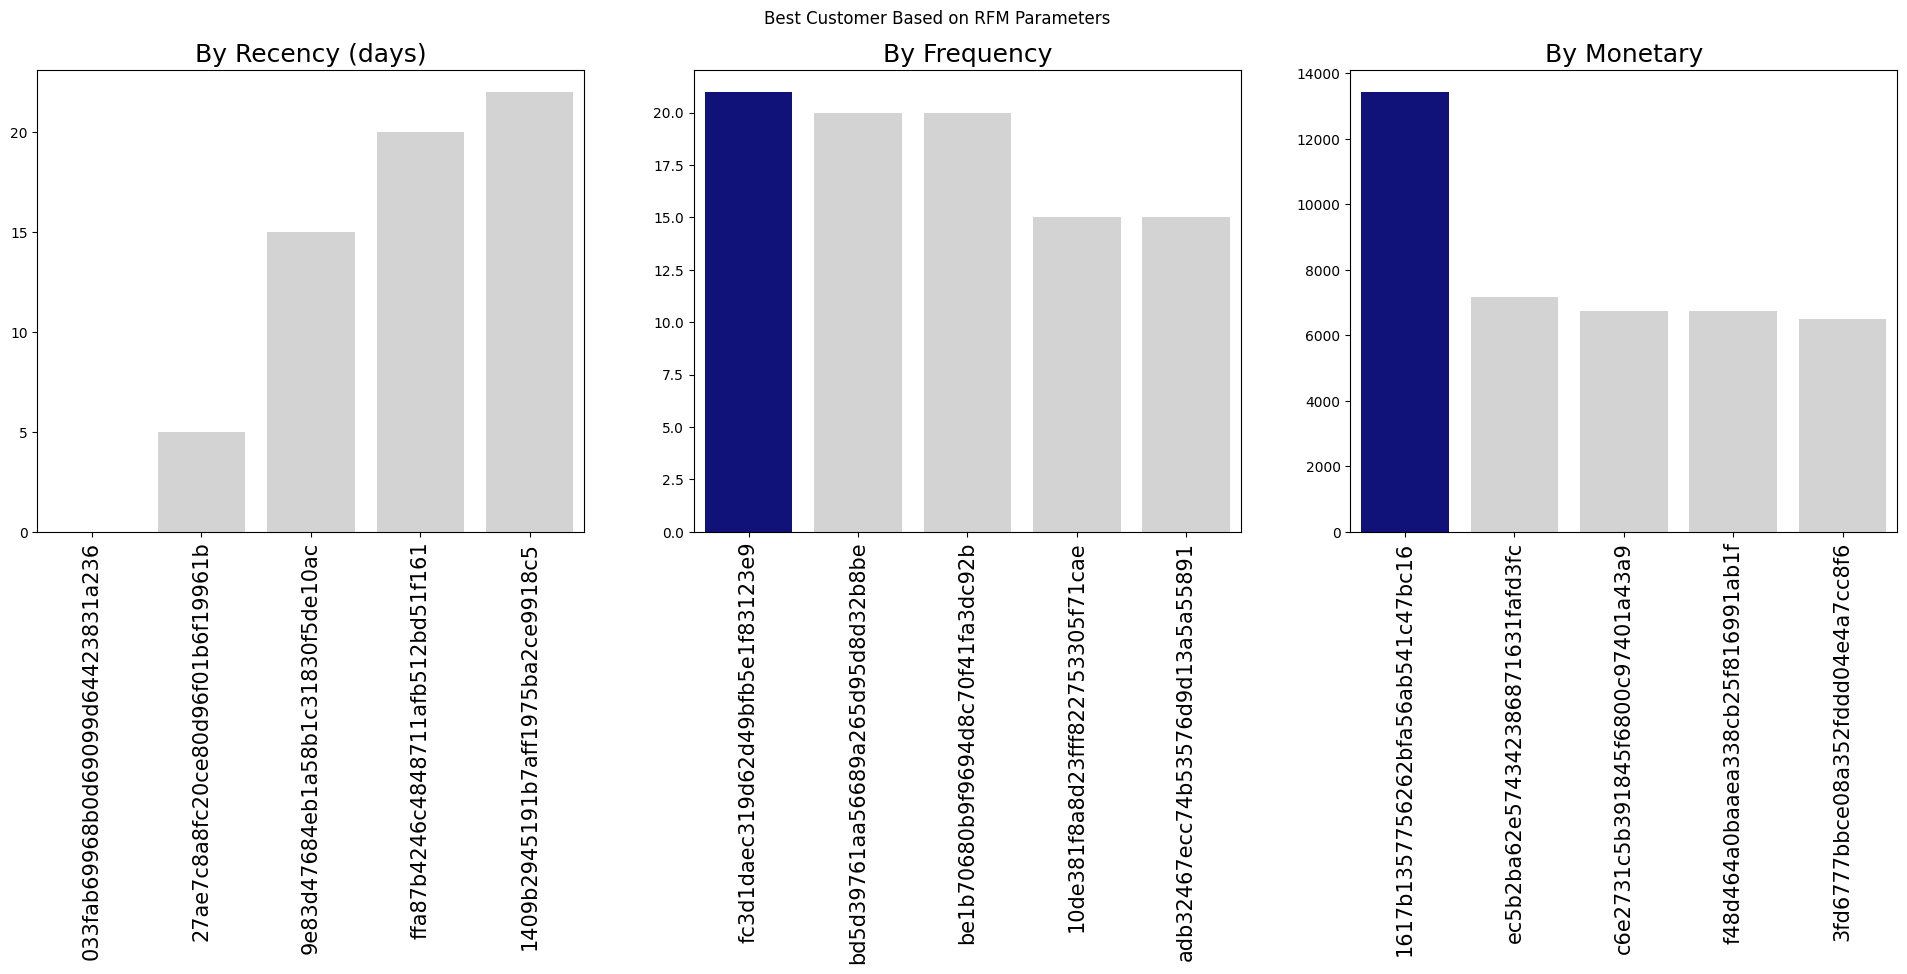

In [37]:
#Visualisasi RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

colors = ["darkblue", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]

sns.barplot(
    y="recency",
    x="customer_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(),
    palette=colors,
    ax=ax[0],
    hue="customer_id"
)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", fontsize=18)
ax[0].tick_params(axis="x", rotation=90, labelsize=15)

sns.barplot(
    y="frequency",
    x="customer_id",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(),
    palette=colors,
    ax=ax[1],
    hue="customer_id"
)

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", fontsize=18)
ax[1].tick_params(axis="x", rotation=90, labelsize=15)

sns.barplot(
    y="monetary",
    x="customer_id",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(),
    palette=colors,
    ax=ax[2],
    hue="customer_id"
)

ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", fontsize=18)
ax[2].tick_params(axis="x", rotation=90, labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters")
plt.show()


#Conclusion

1. Berdasarkan hasil visualisasi data, dapat dilihat bahwa kategori barang yang paling banyak dipesan adalah bed_bath_table, sedangkan kategori barang yang paling sedikit dipesan adalah security_and_services.
2. Berdasarkan hasil visualisasi data, dapat dilihat bahwa distribusi jumlah pesanan berdasarkan status pesanan mayoritas adalah delivered.
3. Berdasarkan hasil visualisasi data, dapat dilihat bahwa profil demografis customer terbanyak berdasarkan negara bagian adalah SP dan profil demografis customer terbanyak berdasarkan kota adalah Sao Paulo.
4. Berdasarkan hasil visualisasi data, dapat dilihat bahwa tingkat kepuasan customer terhadap layanan adalah tinggi karena mayoritas customer memberikan bintang lima.
5. Berdasarkan hasil visualisasi data, dapat dilihat bahwa performa penjualan pada platform E-Commerce setiap bulannya memiliki trend menaik namun cenderung stagnan dalam 6 bulan terakhir.

Analisis RMF:
1. Berdasarkan analisis RFM yang telah dilakukan, rata-rata nilai Recency adalah 275.3 hari. Hal ini menunjukkan bahwa rata-rata pelanggan terakhir kali melakukan transaksi sekitar 275.3 hari yang lalu, atau sekitar 9 bulan yang lalu. Nilai ini menunjukkan bahwa ada frekuensi pembelian yang rendah.
2. Berdasarkan analisis RFM yang telah dilakukan, rata-rata nilai Frekuensi adalah 1.14. Hal ini menunjukkan bahwa rata-rata pelanggan hanya berbelanja satu kali di marketplace perusahaan. Nilai ini mendukung nilai Recency yang menyatakan bahwa rata-rata pembelian terakhir pelanggan adalah 9 bulan yang lalu. Kombinasi nilai Recency dan Frequency yang rendah ini mengindikasikan adanya masalah dalam retensi pelanggan.
3. Berdasarkan analisis RFM yang telah dilakukan, rata-rata nilai Monetary adalah 137.7. Hal ini menunjukkan bahwa rata-rata transaksi yang dilakukan oleh setiap pelanggan menghasilkan pendapatan sebesar 137.7 bagi perusahaan. Dengan adanya temuan ini, perusahaan dapat memperoleh gambaran yang jelas mengenai seberapa besar kontribusi setiap pelanggan terhadap pendapatan bisnis.